Original data shape:
Features (X): (569, 30)
Target (y): (569,)

Top 10 Features and their Chi-Squared Scores:
            Feature          Score
23       worst area  112598.431564
3         mean area   53991.655924
13       area error    8758.504705
22  worst perimeter    3665.035416
2    mean perimeter    2011.102864
20     worst radius     491.689157
0       mean radius     266.104917
12  perimeter error     250.571896
21    worst texture     174.449400
1      mean texture      93.897508




C:\Users\basde\AppData\Local\Temp\ipykernel_9508\2069170465.py:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Score', y='Feature', data=feature_scores.head(k_best), palette='viridis')


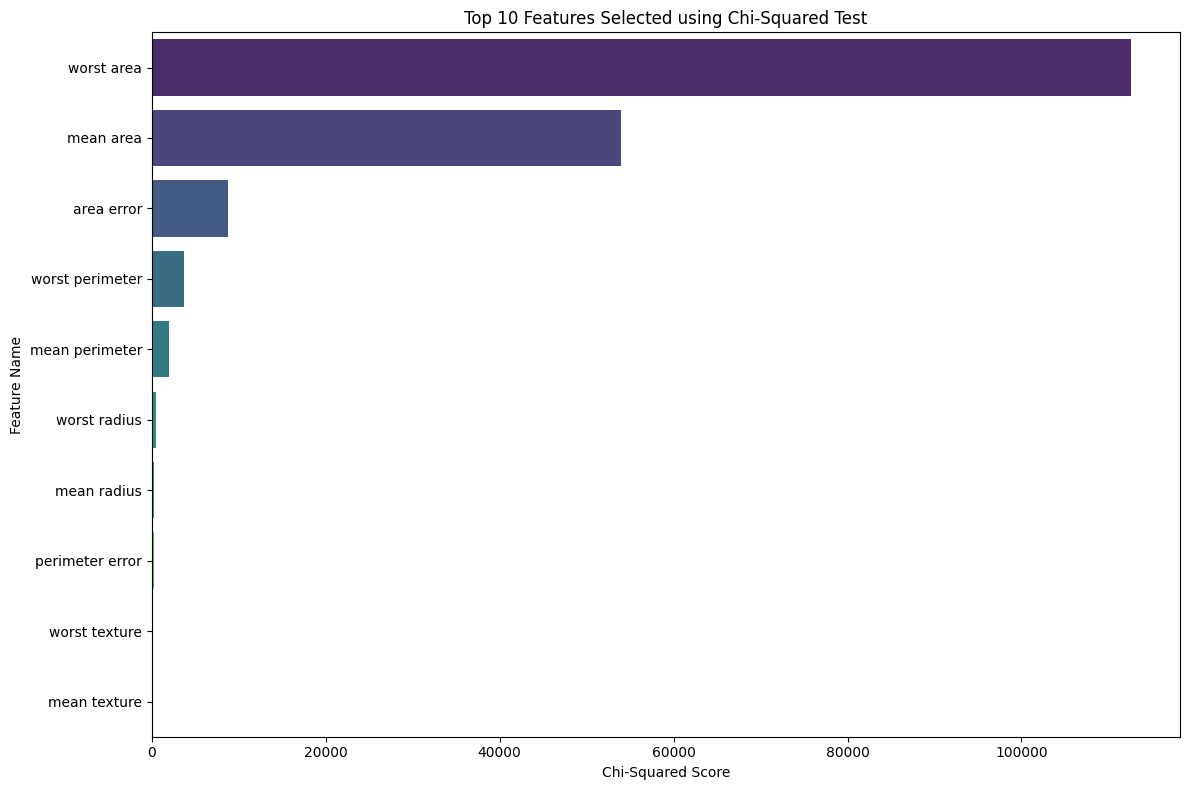

Head of the new DataFrame with selected features:
   mean radius  mean texture  mean perimeter  mean area  perimeter error  \
0        17.99         10.38          122.80     1001.0            8.589   
1        20.57         17.77          132.90     1326.0            3.398   
2        19.69         21.25          130.00     1203.0            4.585   
3        11.42         20.38           77.58      386.1            3.445   
4        20.29         14.34          135.10     1297.0            5.438   

   area error  worst radius  worst texture  worst perimeter  worst area  
0      153.40         25.38          17.33           184.60      2019.0  
1       74.08         24.99          23.41           158.80      1956.0  
2       94.03         23.57          25.53           152.50      1709.0  
3       27.23         14.91          26.50            98.87       567.7  
4       94.44         22.54          16.67           152.20      1575.0  


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectKBest, chi2

# --- When to Use Filter Methods and Data Requirements ---
# Filter methods are a feature selection technique used in machine learning.
# They are generally used as a preprocessing step.
#
# When to use:
# - When you have a high-dimensional dataset and want to reduce the number of features.
# - To improve model performance by removing irrelevant or redundant features.
# - To reduce the computational cost of training a model.
#
# Data Requirements:
# - The target variable should be categorical for methods like Chi-Squared.
# - The features should be non-negative numerical data for the Chi-Squared test.
# - For other filter methods (like correlation), features should be numerical.

# --- Load a Relevant Dataset ---
# We will use the breast cancer dataset from scikit-learn.
# This is a classic binary classification dataset.
cancer = load_breast_cancer()
X = pd.DataFrame(cancer.data, columns=cancer.feature_names)
y = pd.Series(cancer.target)

# Display the shape of the original data
print("Original data shape:")
print(f"Features (X): {X.shape}")
print(f"Target (y): {y.shape}\n")


# --- Select Features to Work With ---
# We will work with all the features in this dataset to find the best ones.

# --- Apply the Filter Method ---
# We will use the Chi-Squared (chi2) test to select the top 10 best features.
# The Chi-Squared test measures the dependence between stochastic variables,
# so using this function "removes" the features that are the most likely
# to be independent of class and therefore irrelevant for classification.

# Initialize the SelectKBest class to select top 10 features
# The `k` parameter specifies the number of top features to select.
k_best = 10
selector = SelectKBest(score_func=chi2, k=k_best)

# Fit the selector to the data
# This will compute the chi-squared stats for each feature.
X_new = selector.fit_transform(X, y)

# Get the columns to keep and create a new dataframe with them
mask = selector.get_support() #list of booleans
new_features = X.columns[mask]
X_selected = pd.DataFrame(X_new, columns=new_features)


# --- Show the Result ---
# We can see the scores for each feature and visualize them.

# Get the scores for each feature
feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': selector.scores_})

# Sort the features by score in descending order
feature_scores = feature_scores.sort_values(by='Score', ascending=False)

print("Top 10 Features and their Chi-Squared Scores:")
print(feature_scores.head(k_best))
print("\n")


# --- Create a Visualization ---
# A bar plot is a good way to visualize the feature scores.
plt.figure(figsize=(12, 8))
sns.barplot(x='Score', y='Feature', data=feature_scores.head(k_best), palette='viridis')
plt.title(f'Top {k_best} Features Selected using Chi-Squared Test')
plt.xlabel('Chi-Squared Score')
plt.ylabel('Feature Name')
plt.tight_layout()
plt.show()


# --- Print the Head of the Resulting DataFrame ---
# This DataFrame contains only the selected features.
print("Head of the new DataFrame with selected features:")
print(X_selected.head())
